# 첫 휴식 구간 비교

In [351]:
import pandas as pd

result=pd.read_csv("D:/Dataset/f_Nirs datasets/first_rest_dataset.csv")
result.fillna(result.mean(),inplace=True)

C:\Users\bml05\AppData\Local\Temp\ipykernel_8124\2372688024.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  result.fillna(result.mean(),inplace=True)


In [352]:
dict={}

for l in list(set(result['name'])):
    name_1_result=[]
    task=['A','B','C']
    result_1=result[result['name']==l]
    for i in task:
        save=[]
        result_1_A=result_1[result['task']==i]
        for j in range(1,16):
            save.append(result_1_A[result['channel']==j]['avg'].values[0])
        name_1_result.append(save)
    for k in range(0,15):
        name_1_result[1][k]=max(name_1_result[1][k],name_1_result[2][k])
    name_1_result.remove(name_1_result[2])
    dict[l]=name_1_result

print(dict)

C:\Users\bml05\AppData\Local\Temp\ipykernel_8124\1066367994.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_1_A=result_1[result['task']==i]
C:\Users\bml05\AppData\Local\Temp\ipykernel_8124\1066367994.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  save.append(result_1_A[result['channel']==j]['avg'].values[0])


{'name_7': [[-0.001129069, -0.001330123, 9.52217e-06, -8.20061e-05, -0.000101118, 0.000183881, 0.000379958, 6.38895e-06, 0.000444292, 0.000407321, 0.00032151, 0.000229787, 0.000402627, -0.000108801, -0.000471506], [0.001825927, 0.001008475, 0.000927155, 0.000881217, 0.001084097, 0.001095367, 0.001819244, 0.001027719, 0.001521181, 0.001581476, 0.000722625, 0.001101925, 0.000735942, 0.000331067, -0.000109076]], 'name_15': [[-0.001263041, -0.001291984, -0.000771531, 0.000170593, 0.0002341, -0.000341627, 0.000417732, 0.000222244, -0.000150614, -5.47748e-05, -8.87382e-05, 0.000473757, -4.65145e-05, 0.000907177, -1.14363e-05], [0.000166899, 0.000410447, 9.70145e-05, 0.000898307, 0.000506166, -0.000138161, 0.001103804, 0.000182946, 0.000230304, 0.000948433, 0.000963463, 0.000602596, 0.000644293, 0.000849682, -0.000161247]], 'name_21': [[-0.001567911, -0.002092131, 0.000231142, -0.000275571, -0.000926298, 0.000358103, -0.000879695, -0.00063474, -0.001061755, -0.001284214, -0.001132611, -0.0006

In [353]:
A=[]
MBC=[]
for i in range(1,16):
    save_A=[]
    save_BC=[]
    for j in list(dict.keys()):
        save_A.append(dict[j][0][i-1])
        save_BC.append(dict[j][1][i-1])
    A.append(save_A)
    MBC.append(save_BC)

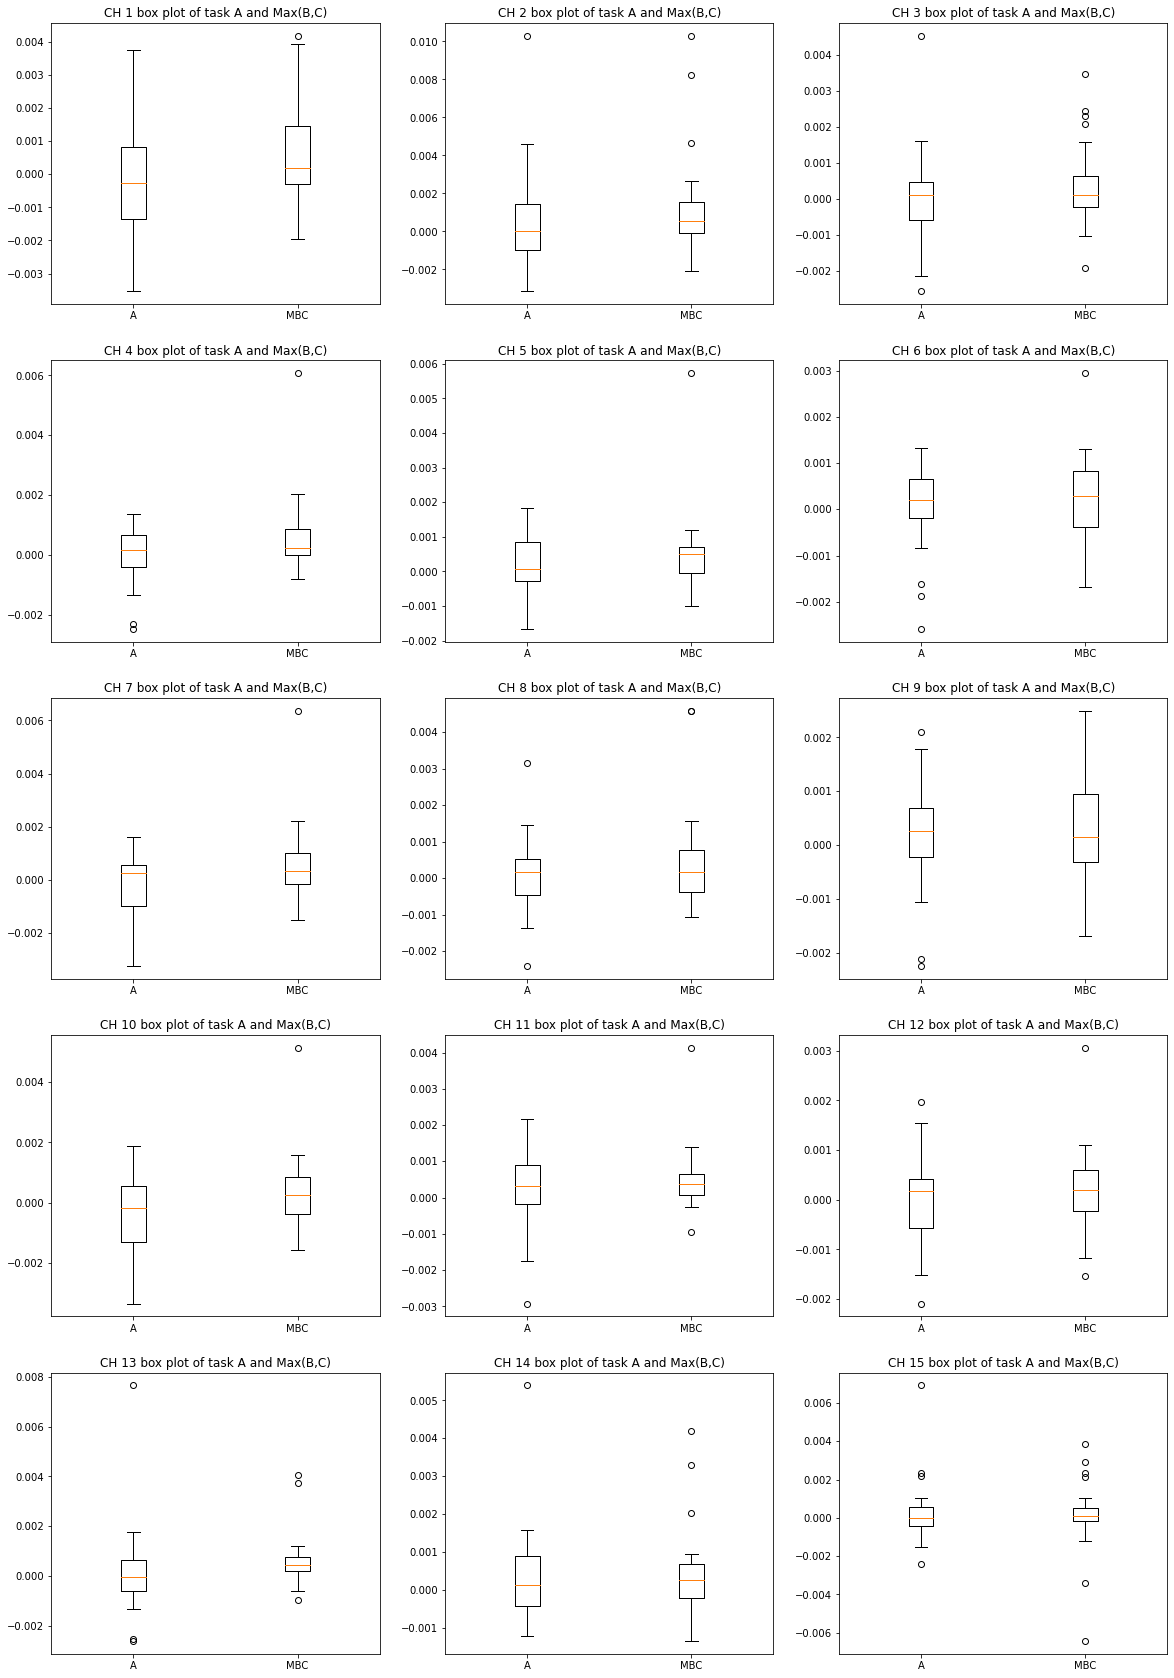

In [354]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(2)
task_list=['A','MBC']
plt.figure(figsize=(20, 30))
plt.title(" 1~15")
for i in range(1,16):
    plt.subplot(5,3,i)
    plt.boxplot([A[i-1],MBC[i-1]])
    plt.xticks([1,2], task_list)
    plt.title('CH '+str(i)+' box plot of task A and Max(B,C)')
plt.show()

In [355]:
import scipy.stats
for i in range(1,16):
    print('\n')
    print("CH "+str(i)+" paired t-test result")
    print(scipy.stats.ttest_rel(A[i-1],MBC[i-1],alternative='less'))



CH 1 paired t-test result
Ttest_relResult(statistic=-2.334523060286645, pvalue=0.013781862021735532)


CH 2 paired t-test result
Ttest_relResult(statistic=-1.982975219562782, pvalue=0.029013734057659796)


CH 3 paired t-test result
Ttest_relResult(statistic=-1.2868561616963563, pvalue=0.10474211256114399)


CH 4 paired t-test result
Ttest_relResult(statistic=-1.892539818428658, pvalue=0.03480175789144946)


CH 5 paired t-test result
Ttest_relResult(statistic=-1.4720683740744598, pvalue=0.07650234915869962)


CH 6 paired t-test result
Ttest_relResult(statistic=-0.5253547872319498, pvalue=0.30189423594863996)


CH 7 paired t-test result
Ttest_relResult(statistic=-2.4294953720427586, pvalue=0.011166256080918374)


CH 8 paired t-test result
Ttest_relResult(statistic=-1.5887154789101336, pvalue=0.0621062668644972)


CH 9 paired t-test result
Ttest_relResult(statistic=-0.5553984756242394, pvalue=0.29168491627786114)


CH 10 paired t-test result
Ttest_relResult(statistic=-2.4369074456847373

# 연주 전 상상하기 비교

C:\Users\bml05\AppData\Local\Temp\ipykernel_8124\821474136.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  result.fillna(result.mean(),inplace=True)
C:\Users\bml05\AppData\Local\Temp\ipykernel_8124\821474136.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_1_A=result_1[result['task']==i]
C:\Users\bml05\AppData\Local\Temp\ipykernel_8124\821474136.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  save.append(result_1_A[result['channel']==j]['avg'].values[0])


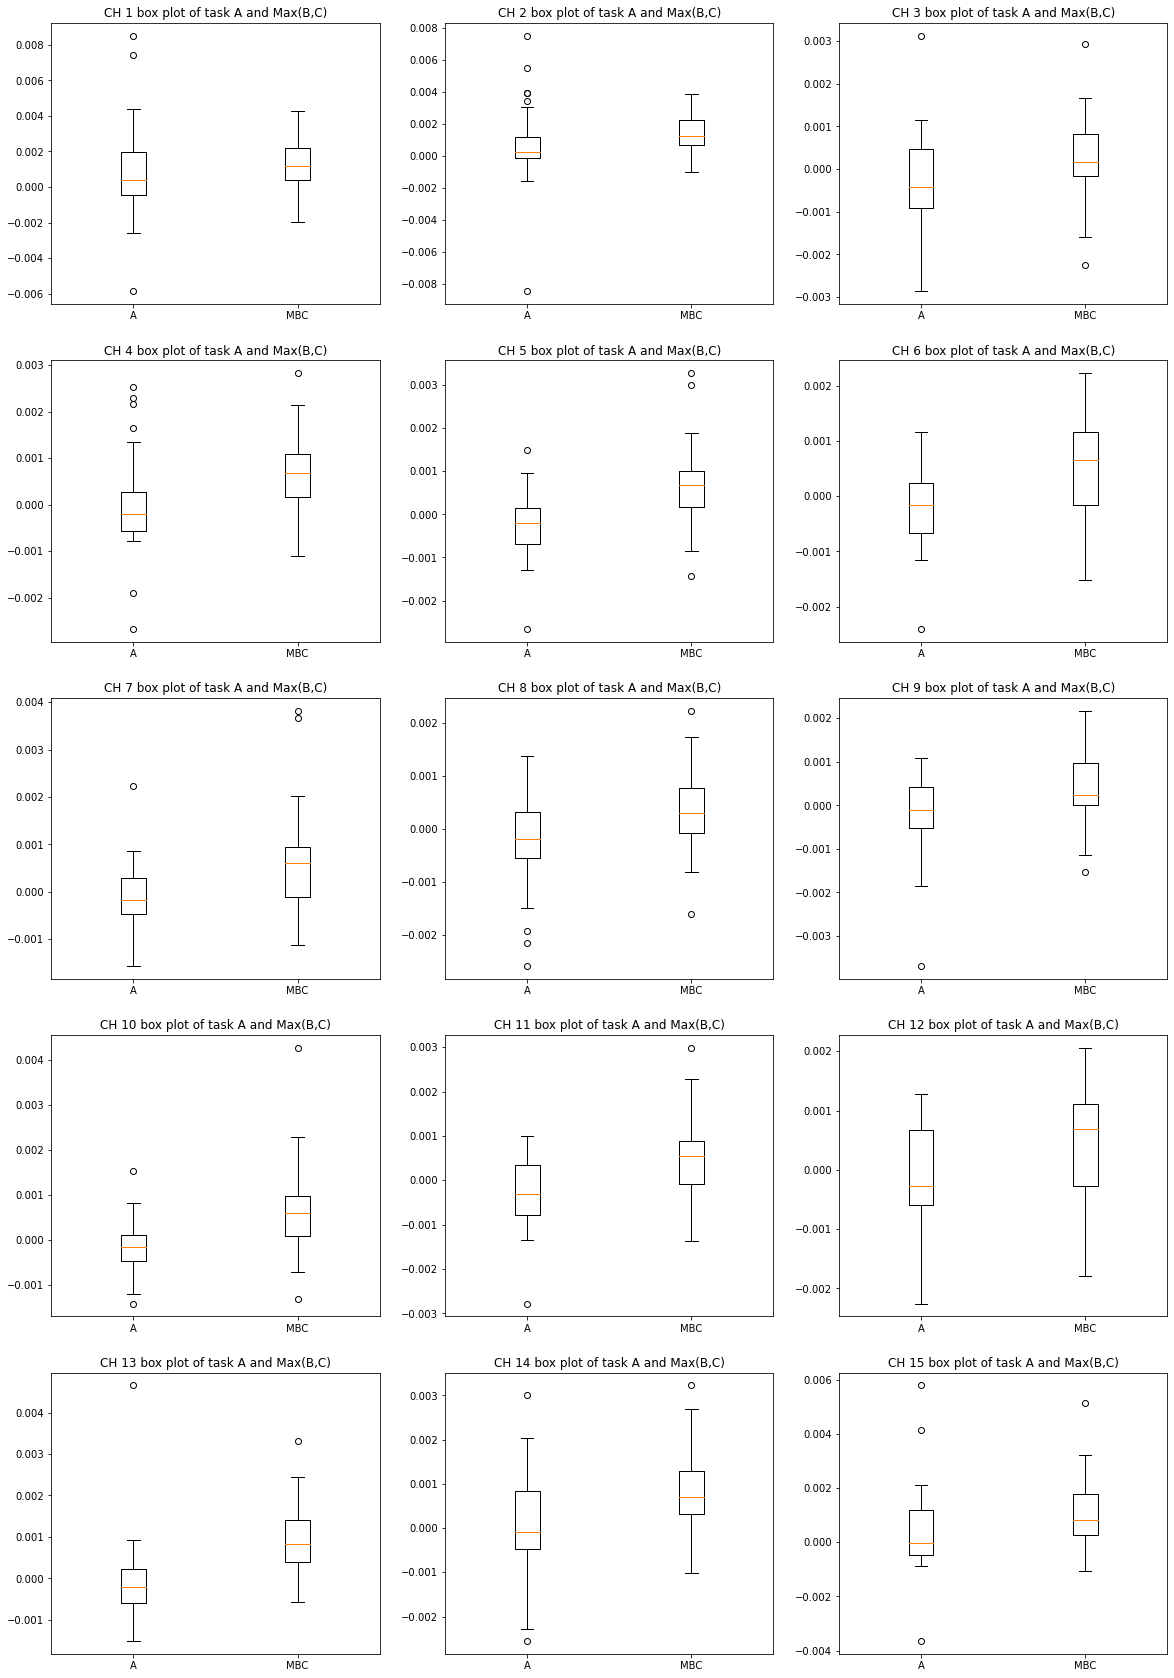



CH 1 paired t-test result
Ttest_relResult(statistic=-0.5894601332076463, pvalue=0.2803202032806119)


CH 2 paired t-test result
Ttest_relResult(statistic=-1.199294184435638, pvalue=0.12061472565442405)


CH 3 paired t-test result
Ttest_relResult(statistic=-2.127564728755791, pvalue=0.021510212161874057)


CH 4 paired t-test result
Ttest_relResult(statistic=-2.6939909409042277, pvalue=0.006100309581346078)


CH 5 paired t-test result
Ttest_relResult(statistic=-4.034689862849394, pvalue=0.00021352359382109163)


CH 6 paired t-test result
Ttest_relResult(statistic=-4.2922964297277595, pvalue=0.00010870221295695252)


CH 7 paired t-test result
Ttest_relResult(statistic=-3.266579131623643, pvalue=0.0015265451764111444)


CH 8 paired t-test result
Ttest_relResult(statistic=-3.090588045810063, pvalue=0.002359159744066539)


CH 9 paired t-test result
Ttest_relResult(statistic=-3.0064927169374758, pvalue=0.0028966881939856306)


CH 10 paired t-test result
Ttest_relResult(statistic=-3.45553459

In [358]:
result=pd.read_csv("D:/Dataset/f_Nirs datasets/see_dataset.csv")
result.fillna(result.mean(),inplace=True)

dict={}

for l in list(set(result['name'])):
    name_1_result=[]
    task=['A','B','C']
    result_1=result[result['name']==l]
    for i in task:
        save=[]
        result_1_A=result_1[result['task']==i]
        for j in range(1,16):
            save.append(result_1_A[result['channel']==j]['avg'].values[0])
        name_1_result.append(save)
    for k in range(0,15):
        name_1_result[1][k]=max(name_1_result[1][k],name_1_result[2][k])
    name_1_result.remove(name_1_result[2])
    dict[l]=name_1_result


A=[]
MBC=[]
for i in range(1,16):
    save_A=[]
    save_BC=[]
    for j in list(dict.keys()):
        save_A.append(dict[j][0][i-1])
        save_BC.append(dict[j][1][i-1])
    A.append(save_A)
    MBC.append(save_BC)
    

task_list=['A','MBC']
plt.figure(figsize=(20, 30))
plt.title(" 1~15")
for i in range(1,16):
    plt.subplot(5,3,i)
    plt.boxplot([A[i-1],MBC[i-1]])
    plt.xticks([1,2], task_list)
    plt.title('CH '+str(i)+' box plot of task A and Max(B,C)')
plt.show()


for i in range(1,16):
    print('\n')
    print("CH "+str(i)+" paired t-test result")
    print(scipy.stats.ttest_rel(A[i-1],MBC[i-1],alternative='less'))

# 연주 전 휴식 비교

C:\Users\bml05\AppData\Local\Temp\ipykernel_8124\1150610170.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  result.fillna(result.mean(),inplace=True)
C:\Users\bml05\AppData\Local\Temp\ipykernel_8124\1150610170.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_1_A=result_1[result['task']==i]
C:\Users\bml05\AppData\Local\Temp\ipykernel_8124\1150610170.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  save.append(result_1_A[result['channel']==j]['avg'].values[0])


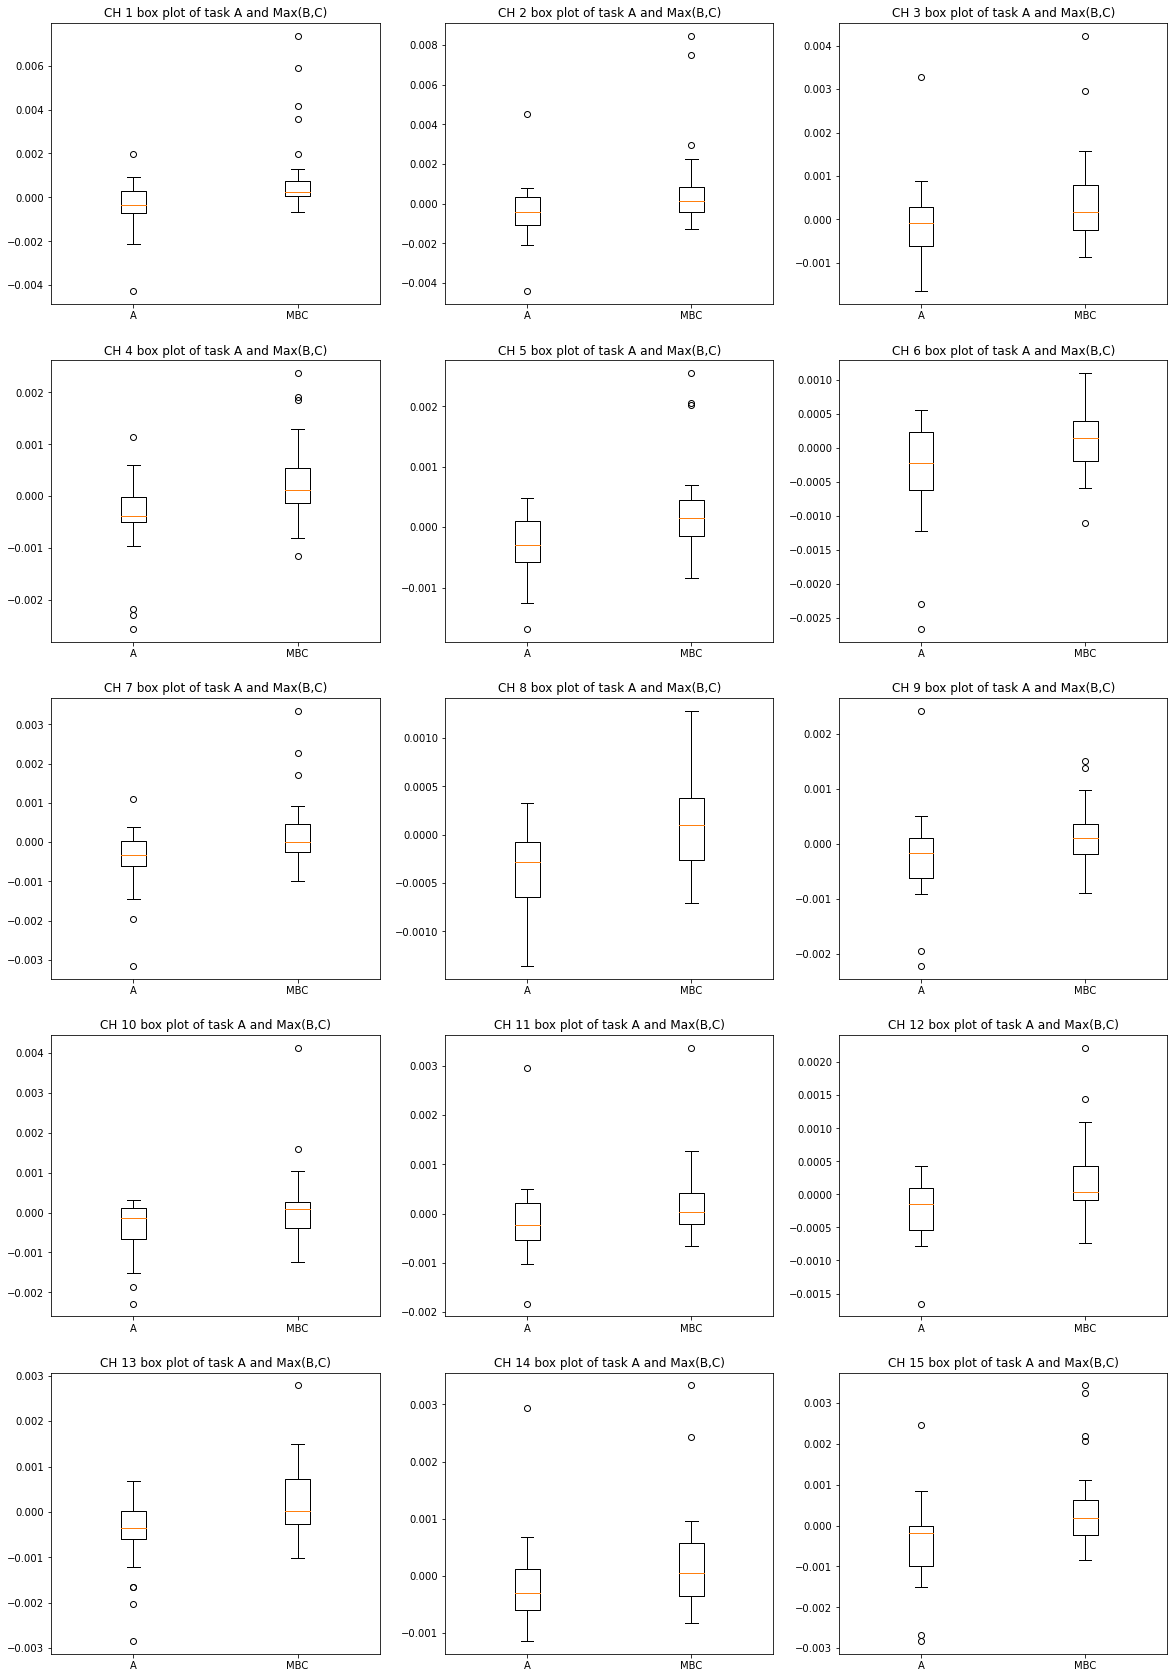



CH 1 paired t-test result
Ttest_relResult(statistic=-3.3506571082847874, pvalue=0.001236840554975386)


CH 2 paired t-test result
Ttest_relResult(statistic=-2.2914018672363428, pvalue=0.015144912629167435)


CH 3 paired t-test result
Ttest_relResult(statistic=-2.4013548998261656, pvalue=0.01188931973608332)


CH 4 paired t-test result
Ttest_relResult(statistic=-4.203103385703733, pvalue=0.00013739905319432255)


CH 5 paired t-test result
Ttest_relResult(statistic=-4.717052137479958, pvalue=3.546618790867996e-05)


CH 6 paired t-test result
Ttest_relResult(statistic=-3.5618200034654404, pvalue=0.0007246050956493003)


CH 7 paired t-test result
Ttest_relResult(statistic=-3.1568712782780337, pvalue=0.0020041773444140444)


CH 8 paired t-test result
Ttest_relResult(statistic=-4.199701861366666, pvalue=0.00013863080550882795)


CH 9 paired t-test result
Ttest_relResult(statistic=-2.0927123794382565, pvalue=0.023140353159332425)


CH 10 paired t-test result
Ttest_relResult(statistic=-3.160

In [360]:
result=pd.read_csv("D:/Dataset/f_Nirs datasets/rest_AS_dataset.csv")
result.fillna(result.mean(),inplace=True)

dict={}

for l in list(set(result['name'])):
    name_1_result=[]
    task=['A','B','C']
    result_1=result[result['name']==l]
    for i in task:
        save=[]
        result_1_A=result_1[result['task']==i]
        for j in range(1,16):
            save.append(result_1_A[result['channel']==j]['avg'].values[0])
        name_1_result.append(save)
    for k in range(0,15):
        name_1_result[1][k]=max(name_1_result[1][k],name_1_result[2][k])
    name_1_result.remove(name_1_result[2])
    dict[l]=name_1_result


A=[]
MBC=[]
for i in range(1,16):
    save_A=[]
    save_BC=[]
    for j in list(dict.keys()):
        save_A.append(dict[j][0][i-1])
        save_BC.append(dict[j][1][i-1])
    A.append(save_A)
    MBC.append(save_BC)
    

task_list=['A','MBC']
plt.figure(figsize=(20, 30))
plt.title(" 1~15")
for i in range(1,16):
    plt.subplot(5,3,i)
    plt.boxplot([A[i-1],MBC[i-1]])
    plt.xticks([1,2], task_list)
    plt.title('CH '+str(i)+' box plot of task A and Max(B,C)')
plt.show()


for i in range(1,16):
    print('\n')
    print("CH "+str(i)+" paired t-test result")
    print(scipy.stats.ttest_rel(A[i-1],MBC[i-1],alternative='less'))

# 연주 비교

C:\Users\bml05\AppData\Local\Temp\ipykernel_8124\112222014.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  result.fillna(result.mean(),inplace=True)
C:\Users\bml05\AppData\Local\Temp\ipykernel_8124\112222014.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_1_A=result_1[result['task']==i]
C:\Users\bml05\AppData\Local\Temp\ipykernel_8124\112222014.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  save.append(result_1_A[result['channel']==j]['avg'].values[0])


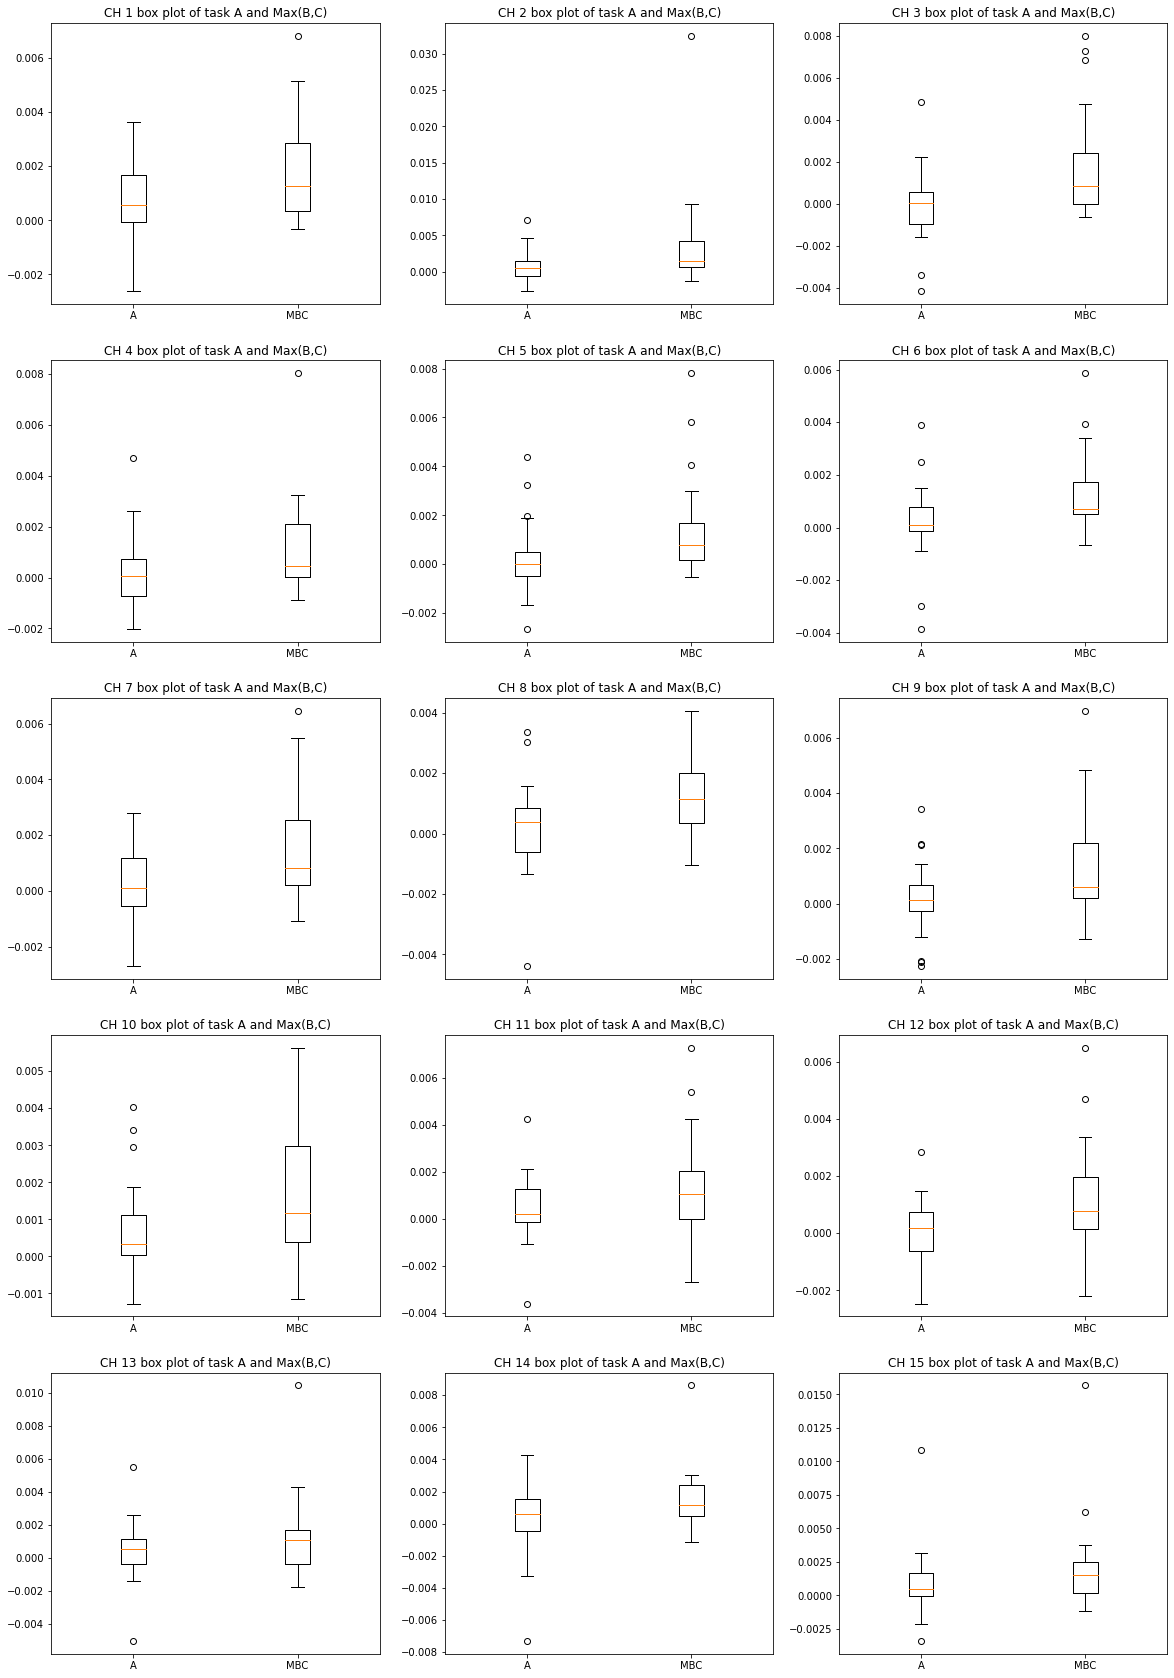



CH 1 paired t-test result
Ttest_relResult(statistic=-2.7588369586014694, pvalue=0.005239974256121348)


CH 2 paired t-test result
Ttest_relResult(statistic=-2.216211389479236, pvalue=0.017817573988765458)


CH 3 paired t-test result
Ttest_relResult(statistic=-3.8630742988478537, pvalue=0.0003337426030960168)


CH 4 paired t-test result
Ttest_relResult(statistic=-3.129800769230766, pvalue=0.0021424836302581032)


CH 5 paired t-test result
Ttest_relResult(statistic=-4.016465777758317, pvalue=0.00022392540389308538)


CH 6 paired t-test result
Ttest_relResult(statistic=-3.6056205203917795, pvalue=0.000647898654234538)


CH 7 paired t-test result
Ttest_relResult(statistic=-3.5443358784056667, pvalue=0.0007576362794857842)


CH 8 paired t-test result
Ttest_relResult(statistic=-3.245868180592064, pvalue=0.0016073884316890683)


CH 9 paired t-test result
Ttest_relResult(statistic=-3.8210705938873923, pvalue=0.00037211189696421807)


CH 10 paired t-test result
Ttest_relResult(statistic=-3.01

In [361]:
result=pd.read_csv("D:/Dataset/f_Nirs datasets/play_dataset.csv")
result.fillna(result.mean(),inplace=True)

dict={}

for l in list(set(result['name'])):
    name_1_result=[]
    task=['A','B','C']
    result_1=result[result['name']==l]
    for i in task:
        save=[]
        result_1_A=result_1[result['task']==i]
        for j in range(1,16):
            save.append(result_1_A[result['channel']==j]['avg'].values[0])
        name_1_result.append(save)
    for k in range(0,15):
        name_1_result[1][k]=max(name_1_result[1][k],name_1_result[2][k])
    name_1_result.remove(name_1_result[2])
    dict[l]=name_1_result


A=[]
MBC=[]
for i in range(1,16):
    save_A=[]
    save_BC=[]
    for j in list(dict.keys()):
        save_A.append(dict[j][0][i-1])
        save_BC.append(dict[j][1][i-1])
    A.append(save_A)
    MBC.append(save_BC)
    

task_list=['A','MBC']
plt.figure(figsize=(20, 30))
plt.title(" 1~15")
for i in range(1,16):
    plt.subplot(5,3,i)
    plt.boxplot([A[i-1],MBC[i-1]])
    plt.xticks([1,2], task_list)
    plt.title('CH '+str(i)+' box plot of task A and Max(B,C)')
plt.show()


for i in range(1,16):
    print('\n')
    print("CH "+str(i)+" paired t-test result")
    print(scipy.stats.ttest_rel(A[i-1],MBC[i-1],alternative='less'))

# 연주 후 휴식 비교

C:\Users\bml05\AppData\Local\Temp\ipykernel_8124\3741272434.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  result.fillna(result.mean(),inplace=True)
C:\Users\bml05\AppData\Local\Temp\ipykernel_8124\3741272434.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result_1_A=result_1[result['task']==i]
C:\Users\bml05\AppData\Local\Temp\ipykernel_8124\3741272434.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  save.append(result_1_A[result['channel']==j]['avg'].values[0])


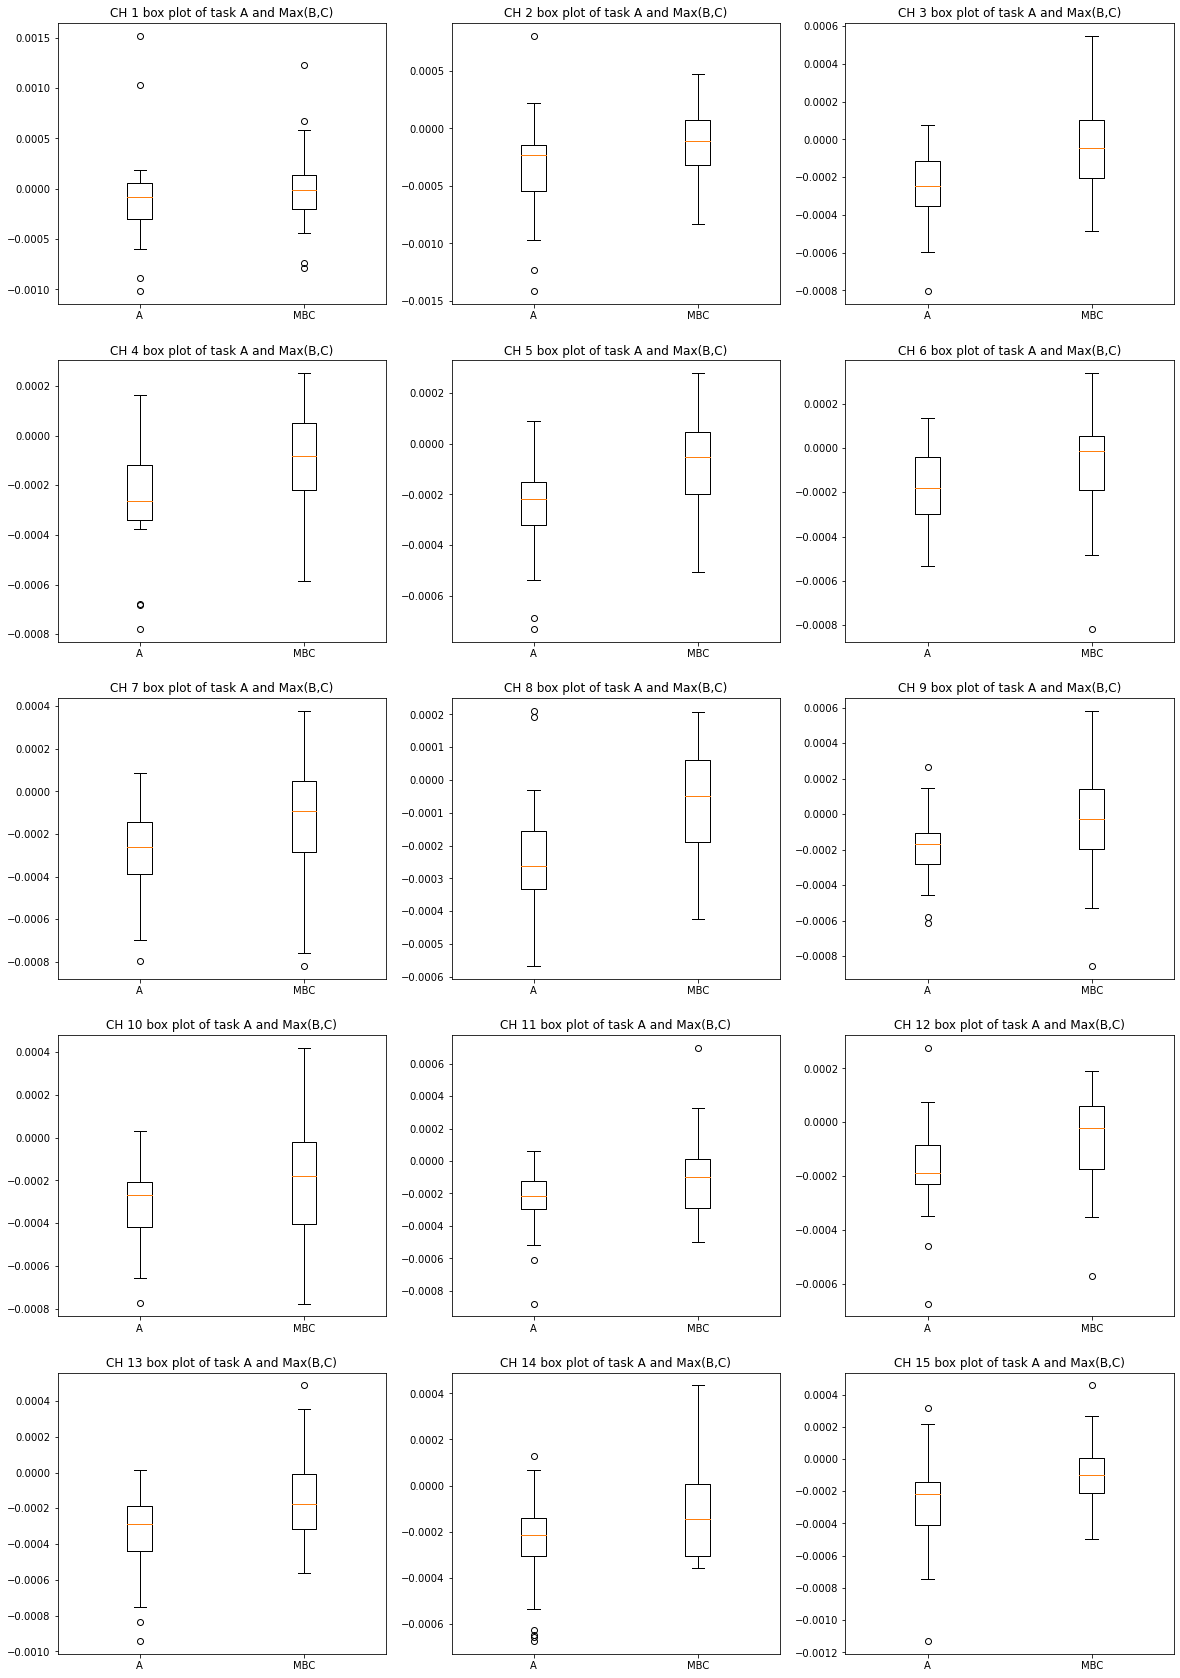



CH 1 paired t-test result
Ttest_relResult(statistic=-0.6995478430221512, pvalue=0.24521080096029307)


CH 2 paired t-test result
Ttest_relResult(statistic=-3.037635602373406, pvalue=0.002685247716348806)


CH 3 paired t-test result
Ttest_relResult(statistic=-3.9779074643841943, pvalue=0.00024760876154222454)


CH 4 paired t-test result
Ttest_relResult(statistic=-3.7329137366896243, pvalue=0.00046725648380093886)


CH 5 paired t-test result
Ttest_relResult(statistic=-4.161967718076118, pvalue=0.00015305047594925443)


CH 6 paired t-test result
Ttest_relResult(statistic=-2.1389142845007645, pvalue=0.021001966971744924)


CH 7 paired t-test result
Ttest_relResult(statistic=-2.5540610501686305, pvalue=0.008426777779424223)


CH 8 paired t-test result
Ttest_relResult(statistic=-3.5887878869969687, pvalue=0.0006763911977810769)


CH 9 paired t-test result
Ttest_relResult(statistic=-2.791626685325283, pvalue=0.0048497047208891685)


CH 10 paired t-test result
Ttest_relResult(statistic=-2.38

In [363]:
result=pd.read_csv("D:/Dataset/f_Nirs datasets/rest_last.csv")
result.fillna(result.mean(),inplace=True)

dict={}

for l in list(set(result['name'])):
    name_1_result=[]
    task=['A','B','C']
    result_1=result[result['name']==l]
    for i in task:
        save=[]
        result_1_A=result_1[result['task']==i]
        for j in range(1,16):
            save.append(result_1_A[result['channel']==j]['avg'].values[0])
        name_1_result.append(save)
    for k in range(0,15):
        name_1_result[1][k]=max(name_1_result[1][k],name_1_result[2][k])
    name_1_result.remove(name_1_result[2])
    dict[l]=name_1_result


A=[]
MBC=[]
for i in range(1,16):
    save_A=[]
    save_BC=[]
    for j in list(dict.keys()):
        save_A.append(dict[j][0][i-1])
        save_BC.append(dict[j][1][i-1])
    A.append(save_A)
    MBC.append(save_BC)
    

task_list=['A','MBC']
plt.figure(figsize=(20, 30))
plt.title(" 1~15")
for i in range(1,16):
    plt.subplot(5,3,i)
    plt.boxplot([A[i-1],MBC[i-1]])
    plt.xticks([1,2], task_list)
    plt.title('CH '+str(i)+' box plot of task A and Max(B,C)')
plt.show()


for i in range(1,16):
    print('\n')
    print("CH "+str(i)+" paired t-test result")
    print(scipy.stats.ttest_rel(A[i-1],MBC[i-1],alternative='less'))